In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import handcalcs.render
import seaborn as sns
from sympy import *

### Gradient Descent illustration

In [2]:
data = pd.DataFrame({'Weight':[0.5, 2.3, 2.9],
                     'Height':[1.4, 1.9, 3.2]
                    })
data

,Weight,Height
0,0.5,1.4
1,2.3,1.9
2,2.9,3.2


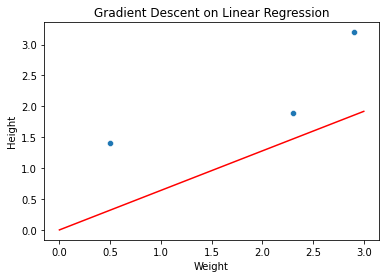

In [26]:
plt.title('Gradient Descent on Linear Regression')
sns.scatterplot(x ='Weight',y='Height',data=data)
sns.lineplot(x= np.arange(0,3, 0.001), y = 0.64*np.arange(0,3, 0.001), color = 'r')
plt.show()

In [21]:
np.arange(0,3, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

### Predict Height using Weight

#### First thing we do is to pick a random value for the interpret

**Predict Height = 0 + 0.64 * Weight**

In [4]:
predict = 0.64 * data['Weight']
actual = data['Height']



In [5]:
%%render
sum_of_squared_residual = sum((actual - predict)**2)



<IPython.core.display.Latex object>

### Now we take the derivative of the sum of squared residual

In [6]:
x = Symbol('x')



In [7]:
%%render
f = (1.4 - (x + 0.64*0.5))**2 + (1.9 - (x + 0.64*2.3))**2 + (3.2 - (x + 0.64*2.9))**2 

<IPython.core.display.Latex object>

In [8]:
learning_rate = 0.1
old_intercept = 0
f.diff(x)

6.0*x - 5.704

#### Since the x is 0, the step size is -5.704

In [9]:
%%render

new_intercept = old_intercept - learning_rate * -5.704 

<IPython.core.display.Latex object>

#### Since the new intercept is 0.57

In [10]:
%%render

slop = 6*0.57 - 5.704

<IPython.core.display.Latex object>

In [11]:
old_intercept = new_intercept

In [12]:
%%render

new_intercept = old_intercept - learning_rate * slop 

<IPython.core.display.Latex object>

In [13]:
%%render

slop = 6*0.799 - 5.704

<IPython.core.display.Latex object>

In [14]:
old_intercept = new_intercept

In [15]:
%%render

new_intercept = old_intercept - learning_rate * slop 

<IPython.core.display.Latex object>

#### In practice, the minimum step size is 0.001 or smaller, the gradient descent will stop if step size is very samll
#### It will also stop when it reaches the maximum number of iterations

In [16]:
x = Symbol('x')
y = Symbol('y')

In [17]:
%%render
f = (1.4 - (x + y*0.5))**2 + (1.9 - (x + y*2.3))**2 + (3.2 - (x + y*2.9))**2 

<IPython.core.display.Latex object>

In [18]:
f.diff(x)

6.0*x + 11.4*y - 13.0

In [19]:
f.diff(y)

11.4*x + 27.9*y - 28.7

### Stochastic Gradient Descent

#### if we have 23000 variables and 1000000 observations

#### We will have 23000 derivatives and 1000000 terms, if we take 1000 steps, there are calculations needs to be made

#### Would randomly take one sample for each step

#### It is especially useful when there is redundancies in the data

In [32]:
data = pd.DataFrame({'Weight':[3.3,3.2,3,  2.1,2.2,2,  1,0.9,1.1],
                     'Height':[3.1,3.3,2.9, 2.2,2.3,2.1,  0.9, 1.1,1]
                    })
data

,Weight,Height
0,3.3,3.1
1,3.2,3.3
2,3.0,2.9
3,2.1,2.2
4,2.2,2.3
5,2.0,2.1
6,1.0,0.9
7,0.9,1.1
8,1.1,1.0


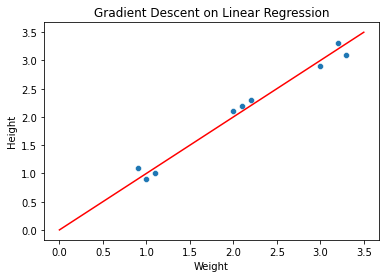

In [34]:
plt.title('Gradient Descent on Linear Regression')
sns.scatterplot(x ='Weight',y='Height',data=data)
sns.lineplot(x= np.arange(0,3.5, 0.001), y = np.arange(0,3.5, 0.001), color = 'r')
plt.show()

#### It is more common to take mini-batch samples each step
